# Exploratory challenge

Our research question:

Are there periodic and seasonal trends (e.g., winter, summer), and how can we model
them?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

f=pd.read_csv("../data/Trips_2018.csv")

In [2]:
print(f.dtypes)

f.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
f['starttime']=pd.to_datetime(f['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
f=f.set_index('starttime')
f['stoptime']=pd.to_datetime(f['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
f['usertype']=pd.Categorical(f['usertype'])
f['gender']=pd.Categorical(f['gender'])
f['start_station_id']=pd.Categorical(f['start_station_id'])
f['end_station_id']=pd.Categorical(f['end_station_id'])

bad_idx = f.index[f.isna().any(axis=1)]
print(bad_idx.tolist())
rows_with_na = f[f.isna().any(axis=1)]
print("rows_with_na first", rows_with_na)

f = f.dropna()

print(f.dtypes)
print(f)

Unnamed: 0                   int64
tripduration                 int64
starttime                   object
stoptime                    object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                   int64
gender                       int64
dtype: object
[Timestamp('2018-08-15 11:31:37.867000'), Timestamp('2018-08-15 11:35:26.014000'), Timestamp('2018-08-15 12:10:37.436000'), Timestamp('2018-08-15 12:15:17.333000'), Timestamp('2018-08-15 12:41:41.969000'), Timestamp('2018-08-15 12:53:40.817000'), Timestamp('2018-08-15 12:54:48.029000'), Timestamp('2018-08-15 13:58:46.212000'), Timestamp('2018-08-15 13:59:50.331000'), Timestamp('2018-08-15 14:20:31.586000'), Timestamp('2018-08-15 14:24:29.303000'), Timestamp('2018-08-15 14:29:27.969000'), Tim

The seasons in NYC are 

Winter : Dec - Feb

Spring: March - May

Summer: June - August

Fall: September - November

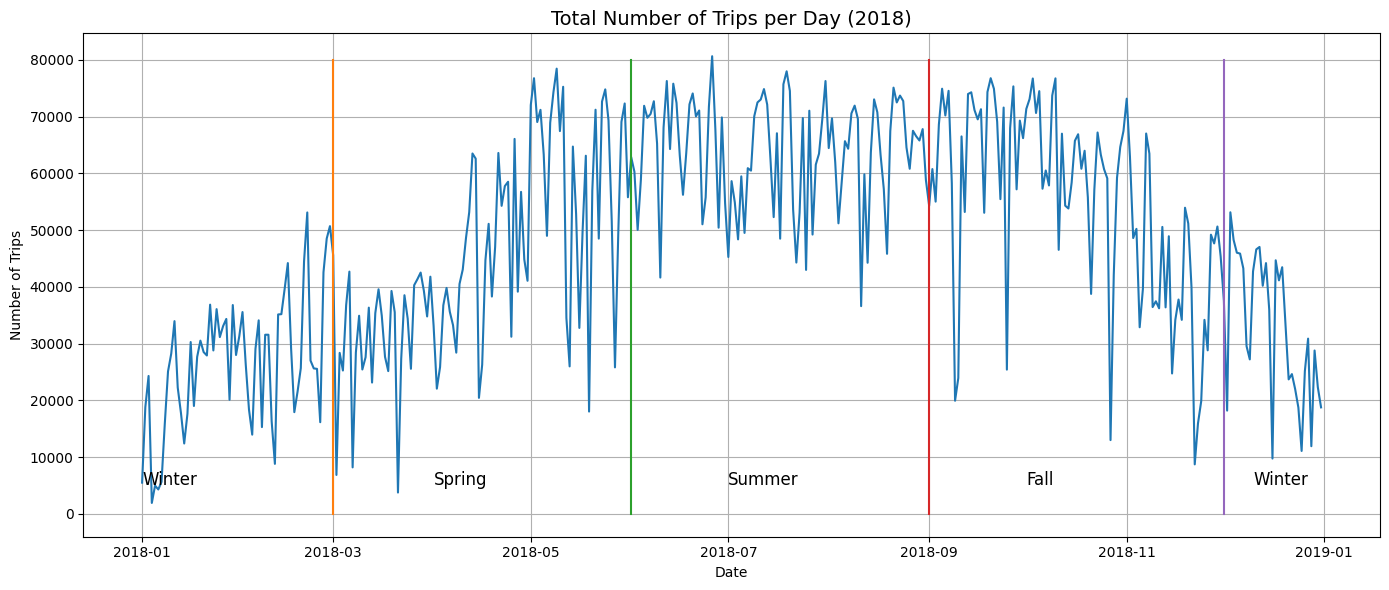

In [12]:
# Count how many trips start on each day
daily_counts = f.resample('D').size()  # 'D' = daily frequency

# Plot
plt.figure(figsize=(14,6))
plt.plot(daily_counts.index, daily_counts.values, linewidth=1.5)
plt.title("Total Number of Trips per Day (2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()

plt.annotate('Winter', xy=(pd.Timestamp('2018-01-01'), 5000), xytext=(pd.Timestamp('2018-01-01'), 5000), fontsize=12)
plt.plot([pd.Timestamp('2018-03-01'), pd.Timestamp('2018-03-01')], [0, 80000])
plt.annotate('Spring', xy=(pd.Timestamp('2018-04-01'), 5000), xytext=(pd.Timestamp('2018-04-01'), 5000), fontsize=12)
plt.plot([pd.Timestamp('2018-06-01'), pd.Timestamp('2018-06-01')], [0, 80000])
plt.annotate('Summer', xy=(pd.Timestamp('2018-07-01'), 5000), xytext=(pd.Timestamp('2018-07-01'), 5000), fontsize=12)
plt.plot([pd.Timestamp('2018-09-01'), pd.Timestamp('2018-09-01')], [0, 80000])
plt.annotate('Fall', xy=(pd.Timestamp('2018-10-01'), 5000), xytext=(pd.Timestamp('2018-10-01'), 5000), fontsize=12)
plt.plot([pd.Timestamp('2018-12-01'), pd.Timestamp('2018-12-01')], [0, 80000])
plt.annotate('Winter', xy=(pd.Timestamp('2018-12-10'), 5000), xytext=(pd.Timestamp('2018-12-10'), 5000), fontsize=12)
plt.show()

We see a obvious trend

Bikes are more frequently used during the summer months

We have non-stationary mean and non-stationary variance

